In [5]:
import ROOT
import pandas as pd
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y840i7mf because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


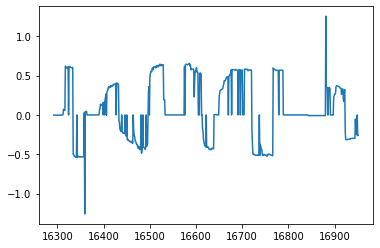

In [20]:
# Get all target polarizations from RCDB
import sys
sys.path.append("/work/clas12/users/gmat/packages/clas12root/rcdb/python/")
import rcdb
from rcdb.provider import RCDBProvider
from rcdb.model import ConditionType

db = RCDBProvider("mysql://rcdb@clasdb/rcdb")
rmin = 16000
rmax = 18000
rlist = []
for path in Path("/volatile/clas12/rg-c/production/ana_data/dst/train/sidisdvcs/").glob("*.hipo"):
    path=str(path)
    runloc = path.index('sidisdvcs/sidisdvcs')
    start = path.index('_',runloc)
    end = path.index('.hipo',runloc)
    runNumber = int(path[start+1:end])
    if(rmin<runNumber and rmax>runNumber):
        rlist.append(runNumber)
rlist=np.array(rlist)
rmin=np.amin(rlist)
rmax=np.amax(rlist)

_rcdb_run = np.arange(rmin,rmax+1)
_rcdb_Tpol = np.zeros(len(_rcdb_run))
for i in range(len(_rcdb_run)):
    run = db.get_run(_rcdb_run[i])
    if(run):
        target_pol_cnd = run.get_condition('target_polarization')
        if(target_pol_cnd):
            _rcdb_Tpol[i] = target_pol_cnd.value
        else:
            _rcdb_Tpol[i] = 0.0
    else:
        _rcdb_Tpol[i] = 0.0

# PARAMETERS
---

In [43]:
TAttMarkers = [20,21,22,23,33,34,29,24,25,26,32,27,28,30]
TColors = [1,2,9,8,6]
MarkerSize = 2

# Webplotdigitizer using Harut's MC data
# https://userweb.jlab.org/~avakian/tmp/2022-SIDIS-Aug8.pdf
# A_LL_proton as a function of x
# [x,A_LL_proton]
A_LL_proton = np.array([
[0.11757848013262741, 0.18379497577967974],
[0.1926541526284828, 0.2684978538773837],
[0.2672720466335098, 0.34164975653604424],
[0.3428054976201935, 0.3981517312610664],
[0.4178811701160489, 0.4407159649813103],
[0.4929568426119043, 0.4885217883139879],
[0.5675747366169313, 0.5337541806020067],
[0.6426504091127867, 0.602493032329989]])

# Webplot digitizer using Harut's MC data
# https://userweb.jlab.org/~avakian/tmp/2022-SIDIS-Aug8.pdf
# NH3 dilution factor f as a function of x
# [x,f]
f_NH3 = np.array([
[0.117026744250078, 0.177177027261547],
[0.12562822371923127, 0.17772179947569455],
[0.1342297031883845, 0.17830842392982116],
[0.14290937792543915, 0.1788241341617871],
[0.15111988105508545, 0.17935517777492244],
[0.16003414159584425, 0.17997120009544962],
[0.16863562106499752, 0.18047914233841564],
[0.17739349106995356, 0.18102689485856938],
[0.18583858000330403, 0.1815937981106982],
[0.19444005947245727, 0.18207997718887511],
[0.20304153894161053, 0.18264986074701012],
[0.21195579948236934, 0.18323909763395071],
[0.220244497879917, 0.18375614607129687],
[0.2286895868132675, 0.1843021232034362],
[0.23744745681822355, 0.1848373200515962],
[0.245892545751574, 0.18539417876613007],
[0.25465041575653, 0.18593523492788716],
[0.26325189522568326, 0.1865720820699886],
[0.27154059362323096, 0.18699956671377962],
[0.2804548541639898, 0.1876155890343068],
[0.28905633363314304, 0.1881478055764606],
[0.2976578131022963, 0.1887428004785831],
[0.3058248744164418, 0.1891597826685512],
[0.3151214229336074, 0.1897605829769269],
[0.32330586097395325, 0.1902669950806733],
[0.3319768473479078, 0.19083420400521306],
[0.3406652104480625, 0.19139969796535447],
[0.34895390884561023, 0.19186317553552745],
[0.35778997411846764, 0.19246054828466017],
[0.36670423465922647, 0.19303053314121038],
[0.37514932359257697, 0.1935346580333707],
[0.3844545604728427, 0.19416775713410842],
[0.3927953890489913, 0.19470988729602234],
[0.4014229336074451, 0.19526162007378994],
[0.4099983479872978, 0.1958152425705318],
[0.4188604783494557, 0.19637195733468613],
[0.42798325960461825, 0.1969587506195048],
[0.43598524201986083, 0.19745540786358048],
[0.44562063669793245, 0.19807052442225448],
[0.45404834890508267, 0.19859524428929248],
[0.46335358578534847, 0.199194861598047],
[0.4713381914743907, 0.19967202867159828],
[0.48063473999155637, 0.20033235216572196],
[0.4895490005323152, 0.20092158905266255],
[0.49783769892986285, 0.20136330345804643],
[0.5063609831311147, 0.2019388117439748],
[0.5150406578681693, 0.202477959230329],
[0.5237985278731254, 0.2030684010352613],
[0.5322436168064758, 0.20361772634659897],
[0.5407473521907523, 0.2041412792085024],
[0.5491337946731768, 0.20470968061087763],
[0.5576136370589279, 0.20522004809192537],
[0.5682134400411167, 0.20591869319120468],
[0.57681491951027, 0.20633790868541513],
[0.5854163989794232, 0.2069329035875375],
[0.5941742689843793, 0.20750576745167867],
[0.6026193579177297, 0.20800570711984107],
[0.6112208373868829, 0.20856722022998025],
[0.6198223168560363, 0.20911199244412781],
[0.6284237963251895, 0.209673505554267],
[0.6370252757943428, 0.2101931664244271],
[0.645235778923989, 0.21074346206795286]])

f_ND3 = np.array([[0.11730854875854804, 0.05148147554387039],
[0.19270740918757046, 0.10740272856982569],
[0.26750211208110397, 0.1724154736521477],
[0.343082219770773, 0.2320762460522311],
[0.41787692266430654, 0.281128371746709],
[0.4930643279559077, 0.3371361559549197],
[0.568251733247509, 0.3973012488577525],
[0.6434391385391103, 0.47910752360645814],
])

def interp(model,x):
    f = interpolate.interp1d(model[:,0], model[:,1], fill_value='extrapolate')
    a=f(x)
    return a

In [12]:
A_LL_proton_sebastian = pd.read_csv("./toolkit/sebastian_A_LL_p.txt",sep=" ",names=["xmin","xmax","Q2min","Q2max","A_LL"])
A_LL_deuteron_sebastian = pd.read_csv("./toolkit/sebastian_A_LL_d.txt",sep=" ",names=["xmin","xmax","Q2min","Q2max","A_LL"])

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75]


# HELPER FUNCTIONS
---

In [ ]:
# Return list of files for analysis
# Consecutive flag reorganizes file list with increasing run number
def get_files(rootdir = "", target = "",runMin = -1,runMax = -1, runList = [], consecutive=True, monteCarlo=False):
    files = []
    runs = []
    for path in Path(rootdir).glob("{}*/*.root".format(target)):
        runNumber = get_run_from_root(str(path))
        if((runMin < 0 and runMax < 0 and runList==[]) or (runNumber >= runMin and runNumber <= runMax) or (runNumber in runList) or monteCarlo==True):
            tfile = ROOT.TFile(str(path),"READ")
            if(tfile.GetListOfKeys().Contains("tree_postprocess")):
                files.append(str(path))
                runs.append(runNumber)
            else:
                print("ERROR: get_files() found a .root file (run",runNumber,") without a tree_reco...skipping...")
                continue
        else:
            continue
    
    # Sort by runNumber if specified
    if(consecutive==True):
        files = [x for y, x in sorted(zip(runs, files))]
    
    return files

In [3]:
# Grab location of rcdb.csv
def get_rcdb(rootdir = ""):
    rcdb_file = rootdir + "rcdb.csv"
    if(not os.path.exists(rcdb_file)):
        print("ERROR: get_rcdb() cannot find file",rcdb_file,". Aborting...")
        return -1
    return rcdb_file

In [5]:
# Extract the run number from root file name
def get_run_from_root(file):
    runloc = file.index('run')
    start = file.index('-',runloc)
    end = file.index('.',runloc)
    runNumber = int(file[start+1:end])
    return runNumber

# Extract other column value based on runNumber
def get_colval_from_run(rcdb_csv,runNumber,col = ''):
    return rcdb_csv.query('Run=={}'.format(runNumber))[col].values[0]

In [7]:
# Using CLAS12Analysis/util/runChargeAsymmetry.csv determine faraday cup accumulation for...
# helicity = parallel to target
# helicity = antiparallel to target

def chargeAsymWeights(file,HWP,Tpol):
    
    runNumber = get_run_from_root(file)
    rCA_df = pd.read_csv('../../../util/runHelicityCounts.csv')
    # Check if this run has had chargeAsymmetry calculated for it
    if(np.sum(rCA_df['Run']==runNumber)==0):
        print("ERROR: Run",runNumber,"does not appear in CLAS12Analysis/util/runHelicityCounts.csv...Aborting...")
        return -1

    # Get accumulated Faraday cup charge for + and - helicity
    # Obtained via HEL::scaler in recon banks
    fcup_pos = get_colval_from_run(rCA_df,runNumber,'fcup_pos')
    fcup_neg = get_colval_from_run(rCA_df,runNumber,'fcup_neg')
    
    if(fcup_pos == 0 or fcup_neg == 0):
        print("ERROR: Zero fcup charge (not all runs currently have this)...skipping")
        return False,False
    elif(HWP==1): # HWP out
        if(Tpol>0):
            return fcup_pos, fcup_neg
        else:
            return fcup_neg, fcup_pos
    elif(HWP==0): # HWP in
        if(Tpol>0):
            return fcup_neg, fcup_pos
        else:
            return fcup_pos, fcup_neg

In [8]:
# Creates an RDataFrame Histo2D
def hist2d(df,direction,name,xbins,ybins):
    zhat = 1 # Pointing from target to CLAS12
    histo2d = df.Define("vz","abs(vz_e+4.5)").Filter("helicity=={} && p_e > 2.6 && th_e > 0.14 && th_e < 0.611 && vz < 4".format(zhat*direction)).Histo2D((name,"",len(xbins)-1,xbins,len(ybins)-1,ybins),"x","Q2")
    return histo2d

In [ ]:
def setAxes(tg,axes):
    tg.GetXaxis().SetLimits(axes[0],axes[1])
    tg.GetYaxis().SetRangeUser(axes[2],axes[3])
    tg.GetYaxis().SetLimits(axes[2],axes[3])
    return tg

# UNWEIGHTED AND WEIGHTED A_LL
---

In [54]:
# For a given run, compute the A_LL
def get_A_LL_hist(file,runNumber,df_rcdb,target,xbins,ybins):
    # Determine polarization direction of the target
    Tpol = 0
    targetPol = get_colval_from_run(df_rcdb,runNumber,'Tpol')
    HWP = get_colval_from_run(df_rcdb,runNumber,'HWP')
    
    # ************************************************************
    # TEMPORARY PROGRAM AS OF AUGUST 24th 2022
    # Set the targetPol of run b/c RCDB is unreliable at the moment
    # ************************************************************
    
    if(runNumber==16406):
        targetPol = 0.275 # Not correct, just temp

    if(targetPol>0):# Extract 
        Tpol = 1
    else:
        Tpol = -1
    
    if(HWP==0): #If the HWP is in, artificially flip Tpol sign
        Tpol = Tpol * -1
    
    # Get accumulated Faraday cup charge for parallel and anti parallel
    fcup_parallel, fcup_antiparallel = chargeAsymWeights(file,HWP,Tpol)
    
    if(fcup_parallel==False):
        return -1
    
    
        
    # Create RDataframe from file
    ROOT.EnableImplicitMT()
    df = ROOT.RDataFrame("tree_postprocess",file)
    
    # Create histograms for anti-parallel/parallel events
    h_ap = hist2d(df,-Tpol,"h_{}_antiparallel".format(runNumber),xbins,ybins)
    h_p = hist2d(df,Tpol,"h_{}_parallel".format(runNumber),xbins,ybins)
    
    
    # Process histograms (from Histo1D --> TH1D)
    H_ap = h_ap.GetValue().Clone()
    H_p = h_p.GetValue().Clone()
    Hw_ap = h_ap.GetValue().Clone() # To be weighted by beam Charge Asym
    Hw_p = h_p.GetValue().Clone()   # To be weighted by beam Charge Asym
    
    H_ap.Sumw2()
    H_p.Sumw2()
    Hw_ap.Sumw2()
    Hw_p.Sumw2()
    
    # Weigh histograms by helicity counts
    # MIGHT'VE MADE A MISTAKE HERE
    # Edited 9/11/2022
    
    Hw_ap.Scale(1/fcup_antiparallel)
    Hw_p.Scale(1/fcup_parallel)

    
    # Grab N+ and N- along with their errors
    N_p = [H_p.GetBinContent(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    N_m = [H_ap.GetBinContent(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    Nw_p = [Hw_p.GetBinContent(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    Nw_m = [Hw_ap.GetBinContent(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    
    N_err_p = [H_p.GetBinError(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    N_err_m = [H_ap.GetBinError(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    Nw_err_p = [Hw_p.GetBinError(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    Nw_err_m = [Hw_ap.GetBinError(i+1,j+1) for i in range(H_p.GetNbinsX()) for j in range(H_p.GetNbinsY())]
    
    # Scale by float to avoid division issues
    H_ap.Scale(1.0)
    H_p.Scale(1.0)
    
    # Create numerator and denominator histogram
    H_numerator = H_p.Clone()
    H_denominator = H_p.Clone()
    Hw_numerator = Hw_p.Clone()
    Hw_denominator = Hw_p.Clone()
    
    # Construct numerator and denominator of asymmetry
    H_numerator.Add(H_ap,-1)
    H_denominator.Add(H_ap,1)
    Hw_numerator.Add(Hw_ap,-1)
    Hw_denominator.Add(Hw_ap,1)
    
    # Divide numerator and denominator
    H = H_numerator.Clone()
    H.Divide(H_denominator)
    Hw = Hw_numerator.Clone()
    Hw.Divide(Hw_denominator)
    
    # Label Histogram
    H.SetTitle("{} asymmetries RG-C;{};{}".format(target,"x","Q^{2}[GeV^{2}]")+"(N^{+}-N^{-})/(N^{+}+N^{-})")
    Hw.SetTitle("{} asymmetries RG-C;{};".format(target,"x","Q^{2}[GeV^{2}]")+"(L^{-}N^{+}-L^{+}N^{-})/(L^{-}N^{+}+L^{+}N^{-})")
    
    # Return run and H
    return [runNumber,target,targetPol,HWP,H.Clone(),Hw.Clone(),fcup_parallel,fcup_antiparallel,N_p,N_m,N_err_p,N_err_m,Nw_p,Nw_m,Nw_err_p,Nw_err_m]

# MAIN CODE
---

In [10]:
def compute_asym(rootdir = "",
                 target  = "",
                 runMin = -1,
                 runMax = -1,
                 runList = [],
                 doRunOrdering = True):
    # Check if user both defined a runList and runRange
    if(runMin>0 and runMax>0 and runList):
        print("ERROR: compute_asym must have EITHER a run range OR a run list defined, not both...Aborting...")
        return -1
    
    # Obtain path to all .root files for analysis
    files = get_files(rootdir, target, runMin, runMax, runList, consecutive = doRunOrdering)
    if(files==[]):
        print("ERROR: compute_asym could not find any files. Aborting...")
        return -1
    
    # List of runs
    runs = []
    for file in files:
        runs.append(get_run_from_root(file))
    
    # Obtain rcdb file and load as pandas csv
    rcdb = get_rcdb(rootdir)
    df_rcdb = pd.read_csv(rcdb)
    
    
    # Define xbins and Q2bins based on Sebastian's table
    xbins,Q2bins=0,0
    if(target=="NH3"):
        xbins = np.unique(np.array(A_LL_proton_sebastian["xmin"].to_list()+A_LL_proton_sebastian["xmax"].to_list()))
        Q2bins = np.unique(np.array(A_LL_proton_sebastian["Q2min"].to_list()+A_LL_proton_sebastian["Q2max"].to_list()))
    elif(target=="ND3"):
        xbins = np.unique(np.array(A_LL_deuteron_sebastian["xmin"].to_list()+A_LL_deuteron_sebastian["xmax"].to_list()))
        Q2bins = np.unique(np.array(A_LL_deuteron_sebastian["Q2min"].to_list()+A_LL_deuteron_sebastian["Q2max"].to_list()))
    else:
        print("ERROR: compute_asym() only works for p and d targets (NH3 ND3)...Aborting...")
        return -1
    
    # Construct A_LL histograms run-by-run
    ret = []
    for run,file in zip(runs,files):
        ret.append(get_A_LL_hist(file,run,df_rcdb,target,xbins,Q2bins))
        print("Completed run",run)
    print("Done")
    return ret

# PLOTTING TOOLS (ASYMMETRIES)
---

In [ ]:
# Assign unique markers and colors to array of TGraphErrors
def stylize_tgrapherrors(tge):
    nMarkers = len(TAttMarkers)
    nColors = len(TColors)
    nPlots = len(tge)
    if(nPlots > nColors * nMarkers):
        print("ERROR: The number of plots sent to stylize_tgrapherrors is too large (",nPlots,">",nColors*nMarkers,")...Aborting...")
        return -1
    
    for i in range(nColors):
        color = TColors[i]
        for j in range(nMarkers):
            marker = TAttMarkers[j]
            if(nMarkers*i+j>=nPlots):
                return tge
            else:
                tge[nMarkers*i+j].SetMarkerStyle(marker)
                tge[nMarkers*i+j].SetMarkerColor(color)
                tge[nMarkers*i+j].SetMarkerColor(color)
                tge[nMarkers*i+j].SetMarkerSize(MarkerSize)  
    return tge
    

In [ ]:
# From an array of plots, get the minimum and maximum y values
# The 'error' parameter is for error bar plots
def get_plot_minmax(plotArr,error, expand = 0.1):
    plotmin, plotmax = 999,-999
    for plot in plotArr:
        for point_idx in range(plot.GetN()):
            tempUp, tempDown = 0,0
            if(error==True):
                tempUp = plot.GetPointY(point_idx) + plot.GetErrorY(point_idx)
                tempDown = plot.GetPointY(point_idx) - plot.GetErrorY(point_idx)
            else:
                tempUp = plot.GetPointY(point_idx)
                tempDown = tempUp
            
            if(tempUp>plotmax):
                plotmax = tempUp
            if(tempDown<plotmin):
                plotmin = tempDown
                
    # Expand range by expand%
    plotRange = plotmax-plotmin
    exp = plotRange * expand
    plotmin = plotmin - 0.5 * exp
    plotmax = plotmax + 0.5 * exp
    
    # Return
    return plotmin,plotmax            

# TOOLS (TARGET POLARIZATION)
---

In [10]:
def unpack_to_dataframe(H):
    runNumberArr = [a[0] for a in H]
    TargArr = [a[1] for a in H]
    TpolArr = [a[2] for a in H]
    HWPArr = [a[3] for a in H]
    histArr = [a[4] for a in H]
    histwArr = [a[5] for a in H]
    fcup_parallelArr = [a[6] for a in H]
    fcup_antiparallelArr = [a[7] for a in H]
    NpArr = [a[8] for a in H]
    NmArr = [a[9] for a in H]
    NperrArr = [a[10] for a in H]
    NmerrArr = [a[11] for a in H]
    NwpArr = [a[12] for a in H]
    NwmArr = [a[13] for a in H]
    NwperrArr = [a[14] for a in H]
    NwmerrArr = [a[15] for a in H]
    xbins = np.unique(np.array(A_LL_proton_sebastian["xmin"].to_list()+A_LL_proton_sebastian["xmax"].to_list()))
    ybins = np.unique(np.array(A_LL_proton_sebastian["Q2min"].to_list()+A_LL_proton_sebastian["Q2max"].to_list()))
    
    # Create column names for pandas dataframe
    cols = ["Run","Target","Tpol","HWP","xmin","xmax","x","Q2min","Q2max","Q2","A_LL","A_LL_err","A_LL_wt","A_LL_wt_err","A_||","f","fcup_parallel","fcup_antiparallel","N+","N-","N+err","N-err","n+","n-","n+err","n-err"]
    
    # Create Pandas Dataframe
    df = pd.DataFrame(columns=cols)
    
    # Append rows to dataframe
    for r,targ,tpol,hwp,h,hw,Np,Nn,_np,_nm,_nwp,_nwm,_nperr,_nmerr,_nwperr,_nwmerr in zip(runNumberArr, TargArr, TpolArr, HWPArr,histArr,histwArr,
                                                                                                        fcup_parallelArr,fcup_antiparallelArr,
                                                                                                        NpArr,NmArr,NwpArr,NwmArr,
                                                                                                        NperrArr,NmerrArr,NwperrArr,NwmerrArr):
        row = []
        bin_idx = -1
        for xbin_idx in range(h.GetNbinsX()):
            for ybin_idx in range(h.GetNbinsY()):
                bin_idx+=1
                
                xl = xbins[xbin_idx]
                xr = xbins[xbin_idx+1]
                xc = (xl+xr)/2
                
                yl = ybins[ybin_idx]
                yr = ybins[ybin_idx+1]
                yc = (yl+yr)/2

                a_ll = h.GetBinContent(xbin_idx+1,ybin_idx+1)
                a_ll_err = h.GetBinError(xbin_idx+1,ybin_idx+1)

                a_ll_wt = hw.GetBinContent(xbin_idx+1,ybin_idx+1)
                a_ll_wt_err = hw.GetBinError(xbin_idx+1,ybin_idx+1)
    
                a_ll_theory = []
                if(targ=="NH3"):
                    a_ll_theory = A_LL_proton_sebastian[(A_LL_proton_sebastian["xmin"]==xl) &
                                                        (A_LL_proton_sebastian["Q2min"]==yl)]["A_LL"].to_list()
                elif(targ=="ND3"):
                    a_ll_theory = A_LL_deuteron_sebastian[(A_LL_deuteron_sebastian["xmin"]==xl) &
                                                        (A_LL_deuteron_sebastian["Q2min"]==yl)]["A_LL"].to_list()
                
                if(a_ll_theory==[]):
                    continue # Do not care about x-Q2 bins with no theory A_LL
                else:
                    a_ll_theory = a_ll_theory[0]
                    
                if(TargArr[0]=="NH3"):
                    f = np.round(interp(f_NH3,xc),6)
                else:
                    f = np.round(interp(f_ND3,xc),6)
                
                if(hwp==0):
                    hwp="in"
                else:
                    hwp="out"
                
                
                
                row = [r,targ,tpol,hwp,xl,xr,xc,yl,yr,yc,a_ll,a_ll_err,a_ll_wt,a_ll_wt_err,a_ll_theory,
                       f,Np,Nn,
                       _np[bin_idx],_nm[bin_idx],_nperr[bin_idx],_nmerr[bin_idx],
                       _nwp[bin_idx],_nwm[bin_idx],_nwperr[bin_idx],_nwmerr[bin_idx]]
                
                # Add row
                df.loc[len(df.index)] = row

    # Return dataframe
    return df

In [ ]:
# Calculates the Pt using Sebastian's bin-by-bin weighing scheme
def calc_Pt(nruns,reps,Np,Np_err,Nm,Nm_err,A_th,beamPol,f):

    Pt_Arr = []
    Pt_err_Arr = []
    
    for i in range(nruns):
        
        _s = slice(i*reps,(i+1)*reps)
        
        numerator = np.sum((Np[_s]-Nm[_s])*A_th[_s]*f[_s])
        denominator = np.sum((Np[_s]+Nm[_s])*A_th[_s]*A_th[_s]*f[_s]*f[_s])

        numerator_err = np.sqrt(np.sum(  (A_th[_s]*f[_s])**2 * (Np_err[_s]**2+Nm_err[_s]**2)   ) )
        denominator_err = np.sqrt(np.sum(  (A_th[_s]*f[_s])**4 * (Np_err[_s]**2+Nm_err[_s]**2) ) )
        
        Pt_Arr.append(numerator/denominator/beamPol)
        Pt_err_Arr.append(np.sqrt(numerator**2*denominator_err**2+denominator**2*numerator_err**2)/beamPol/denominator/denominator)
        #Pt_err_Arr.append(1/np.sqrt(     
        #                            np.sum((  Np[_s] + Nm[_s] ) * f[_s]**2*A_th[_s]**2)        
        #                          )
        #                 )
        
    return Pt_Arr, Pt_err_Arr

In [23]:
font = {'size'   : 15}
plt.rc('font', **font)

markerColors=['k','r','b','g','y']
markerStyles=['.','o','v','^','<','>','s','P','*','X','x','d']
markers = [mc+ms for mc in markerColors for ms in markerStyles]

plt.rcParams['text.usetex'] = True
def multigraph(df,beamPol):
    
    # Extract arrays
    runNumberArr = df["Run"].to_numpy()
    TargArr = df["Target"].to_list()
    TpolArr = df["Tpol"].to_numpy()
    HWPArr = df["HWP"].to_list()
    xminArr = df["xmin"].to_numpy()
    xmaxArr = df["xmax"].to_numpy()
    xArr = df["x"].to_list()
    Q2minArr = df["Q2min"].to_numpy()
    Q2maxArr = df["Q2max"].to_numpy()
    Q2Arr = df["Q2"].to_list()
    A_Arr = df["A_LL"].to_numpy()
    A_err_Arr = df["A_LL_err"].to_numpy()
    A_wt_Arr = df["A_LL_wt"].to_numpy()
    A_wt_err_Arr = df["A_LL_wt_err"].to_numpy()
    A_th_Arr = df["A_||"].to_numpy()
    dilution_Arr = df["f"].to_numpy()
    FCup_parallelArr = df["fcup_parallel"].to_numpy() 
    FCup_antiparallelArr = df["fcup_antiparallel"].to_numpy() 
    Np_Arr = df["N+"].to_numpy()
    Nm_Arr = df["N-"].to_numpy()
    Nwp_Arr = df["n+"].to_numpy()
    Nwm_Arr = df["n-"].to_numpy()
    Np_err_Arr = df["N+err"].to_numpy()
    Nm_err_Arr = df["N-err"].to_numpy()
    Nwp_err_Arr = df["n+err"].to_numpy()
    Nwm_err_Arr = df["n-err"].to_numpy()
    
    # Extract unique arrays (b/c of repetitive vals)
    reps = np.sum(TpolArr==TpolArr[0]) # Number of kinematic bins (e.g. xbins)
    urunNumberArr = runNumberArr[::reps]
    uTargArr = TargArr[::reps]
    uTpolArr = TpolArr[::reps]
    uHWPArr = HWPArr[::reps]
    uFCup_parallelArr = FCup_parallelArr[::reps]
    uFCup_antiparallelArr = FCup_antiparallelArr[::reps]
    nruns = len(uTargArr)

    
    # Bools for selection
    bool_negPol = (uTpolArr<0)
    bool_HWPin  = np.array([(hwp=="in") for hwp in uHWPArr])
    bool_HWPout = np.array([(hwp=="out") for hwp in uHWPArr])
    
    
    fig1, axs1 = plt.subplots(1,2,figsize=(20, 10))
    # Tpol vs. run
    axs1[0].plot(urunNumberArr[bool_HWPin],uTpolArr[bool_HWPin],"k.",label="HWP in")
    axs1[0].plot(urunNumberArr[(bool_negPol * bool_HWPin)],-uTpolArr[(bool_negPol * bool_HWPin)],"r.")
    axs1[0].plot(urunNumberArr[bool_HWPout],uTpolArr[bool_HWPout],"kx",label="HWP out")
    axs1[0].plot(urunNumberArr[(bool_negPol * bool_HWPout)],-uTpolArr[(bool_negPol * bool_HWPout)],"rx")
    axs1[0].set_xlabel("Run")
    axs1[0].set_ylabel("Tpol")
    axs1[0].grid()
    axs1[0].legend()

    # Faraday cup ratio vs. run
    uFCup_ratio = (uFCup_parallelArr-uFCup_antiparallelArr)/(uFCup_parallelArr+uFCup_antiparallelArr)
    axs1[1].plot(urunNumberArr[bool_HWPin],uFCup_ratio[bool_HWPin],"k.",label="HWP in")
    axs1[1].plot(urunNumberArr[bool_HWPout],uFCup_ratio[bool_HWPout],"kx",label="HWP out")
    axs1[1].set_xlabel("Run")
    axs1[1].set_ylabel("(FC+  -  FC-)/(FC+  +  FC-)")
    axs1[1].grid()
    axs1[1].legend()

    # Dilution
    fig6,axs6 = plt.subplots(1,1,figsize=(20,10))
    Nruns = len(urunNumberArr)
    for i,r,xmin,xmax,f in zip(range(len(runNumberArr)),runNumberArr,xminArr,xmaxArr,dilution_Arr):
        idx = np.floor(i/reps)
        xrange = xmax-xmin
        xcenter = (xmax+xmin)/2
        x = xcenter
        y = f
        yerr = 0
        
        if(i%nruns==0):
            axs6.errorbar(x,y,yerr=yerr,fmt="ko-")
        else:
            continue
    axs6.grid()
    axs6.set_xlabel("x",fontsize=20)
    axs6.set_ylabel(r"Dilution factor",fontsize=30)
    
    # Target Polarization vs. Run Number
    Nruns = len(urunNumberArr)
    fig8,axs8 = plt.subplots(1,1,figsize=(20,10))
    
    Pt_w_Arr, Pt_w_err_Arr = calc_Pt(nruns,reps,Nwp_Arr,Nwp_err_Arr,Nwm_Arr,Nwm_err_Arr,A_th_Arr, beamPol,dilution_Arr)
    Pt_Arr, Pt_err_Arr = calc_Pt(nruns,reps,Np_Arr,Np_err_Arr,Nm_Arr,Nm_err_Arr,A_th_Arr, beamPol,dilution_Arr)
    
    axs8.errorbar(urunNumberArr,Pt_w_Arr,yerr=Pt_w_err_Arr,label="FCup weights",fmt="ro-")
    axs8.errorbar(urunNumberArr,Pt_Arr,yerr=Pt_err_Arr,label="No FCup weights",fmt="ko-")
    axs8.grid()
    axs8.legend()
    axs8.set_xlabel("Run",fontsize=20)
    axs8.set_ylabel(r"$P_{t}=\frac{1}{P_b}\frac{\sum_{x,Q^{2}}\left[(N^{+}-N^{-}) A_{||}(x,Q^{2})f(x)\right]}{\sum_{x,Q^2}\left[(N^{+}+N^{-}) A^{2}_{||}(x,Q^{2})f^{2}(x)\right]}$",fontsize=30)
    axs8.text(0.15,0.25,r"$P_b={:.1f}\%$".format(100*beamPol),fontsize=25,horizontalalignment='center',
     verticalalignment='center',transform=axs8.transAxes)
    
    fig9,axs9 = plt.subplots(1,1,figsize=(20,10))
    rmin = np.amin(urunNumberArr)
    rmax = np.amax(urunNumberArr)
    boolTpolPos = np.array([_t > 0 for _t in _rcdb_Tpol]) * np.array([_r >= rmin and _r <= rmax for _r in _rcdb_run])
    boolTpolNeg = np.array([_t < 0 for _t in _rcdb_Tpol]) * np.array([_r >= rmin and _r <= rmax for _r in _rcdb_run])
    axs9.errorbar(urunNumberArr,Pt_w_Arr,yerr=Pt_w_err_Arr,label="FCup weights",fmt="ro")
    axs9.errorbar(urunNumberArr,Pt_Arr,yerr=Pt_err_Arr,label="No FCup weights",fmt="ko")
    axs9.plot(_rcdb_run[boolTpolPos],_rcdb_Tpol[boolTpolPos],"k*",label=r"RCDB Tpol$>$0",markersize=10,fillstyle='none')
    axs9.plot(_rcdb_run[boolTpolNeg],np.abs(_rcdb_Tpol[boolTpolNeg]),"r*",label=r"RCDB Tpol$<$0",markersize=10,fillstyle='none')
    axs9.grid()
    axs9.legend()
    axs9.set_xlabel("Run",fontsize=20)
    axs9.set_ylabel(r"$P_{t}$",fontsize=30)
    axs9.text(0.15,0.25,r"$P_b={:.1f}\%$".format(100*beamPol),fontsize=25,horizontalalignment='center',
     verticalalignment='center',transform=axs9.transAxes)
    # Return stuff
    DF = df.copy()
    DF["Pb"]=np.ones(reps*nruns)*beamPol
    DF["Pt"]=np.repeat(Pt_Arr,reps)
    DF["Pt_err"]=np.repeat(Pt_err_Arr,reps)
    DF.rename(columns={'Tpol':'Tpol RCDB'}, inplace=True)
    return DF

In [25]:
_rcdb_Tpol[_rcdb_run>16889]

array([ 0.338024 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.218864 ,  0.246514 ,
        0.261609 ,  0.264517 ,  0.279058 ,  0.35903  ,  0.37101  ,
        0.3708   ,  0.369165 ,  0.367786 ,  0.363347 ,  0.362027 ,
        0.360724 ,  0.350153 ,  0.342504 ,  0.341175 ,  0.337956 ,
        0.262453 ,  0.306405 ,  0.330464 ,  0.328915 ,  0.191298 ,
        0.17075  ,  0.293623 ,  0.321474 , -0.204385 , -0.31049  ,
       -0.314828 , -0.316095 , -0.315002 , -0.312189 , -0.310437 ,
       -0.310549 , -0.308846 , -0.310256 , -0.311166 , -0.304641 ,
       -0.302145 , -0.299575 , -0.300173 , -0.298836 , -0.297872 ,
       -0.297808 , -0.297843 , -0.298551 , -0.297707 , -0.297768 ,
       -0.0519911, -0.187276 , -0.214919 , -0.25232  ,  0.       ,
       -0.262031 , -0.261504 ])